In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

<h2>Exploratory Data Analysis </h2>

In [90]:
# Create dataframe of the csv files
training_df = pd.read_csv("train.csv", index_col=False)
test_df = pd.read_csv("test.csv", index_col= False)

# Find and fill any missing values
print(training_df.isna().sum())
print(test_df.isna().sum())

Index        0
Sentiment    0
Text         0
dtype: int64
Index        0
Sentiment    0
Text         0
dtype: int64


In [91]:
# Find the size of each of the datasets and what it includes
print(training_df.head())
print(test_df.head())

print("Size of training dataset " + str(training_df.size))
print("Size of test dataset " + str(test_df.size))

   Index  Sentiment                                               Text
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      1          0  is upset that he can't update his Facebook by ...
2      2          0  @Kenichan I dived many times for the ball. Man...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  @nationwideclass no, it's not behaving at all....
   Index  Sentiment                                               Text
0      0          1  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      1          1  Reading my kindle2...  Love it... Lee childs i...
2      2          1  Ok, first assesment of the #kindle2 ...it fuck...
3      3          1  @kenburbary You'll love your Kindle2. I've had...
4      4          1  @mikefish  Fair enough. But i have the Kindle2...
Size of training dataset 3145725
Size of test dataset 1077


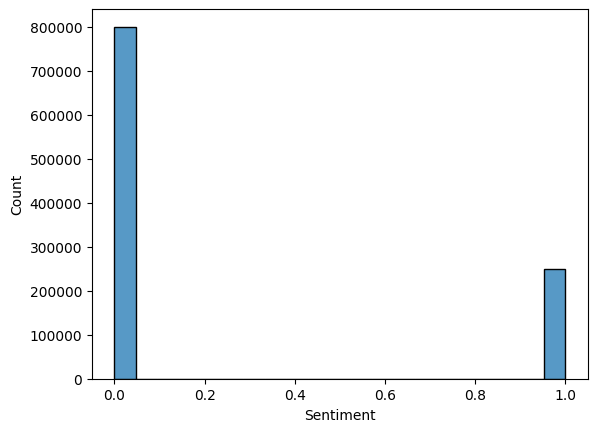

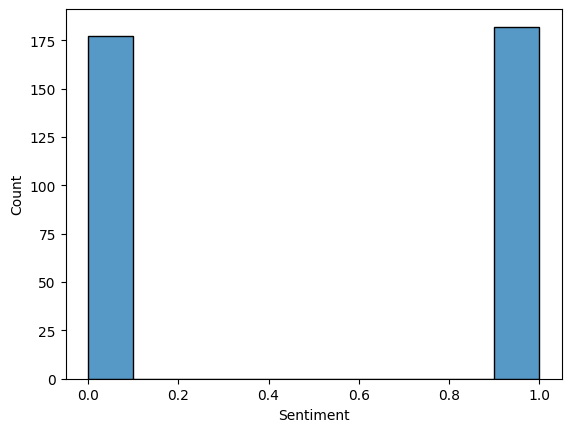

In [92]:
# See distribution of sentiment scores in the dataset
training_fig = sns.histplot(data=training_df['Sentiment'])
plt.show(training_fig)
test_fig = sns.histplot(data=test_df['Sentiment'])
plt.show(test_fig)

<h2>Text Preprocessing </h2>

In [93]:
# 1. Change case to lowercase
train_temp = training_df["Text"]
lower_case_train = []
for item in train_temp:
    res = item.lower()
    lower_case_train.append(res)
print(lower_case_train[1])


test_temp = test_df["Text"]
lower_case_test = []
for item in test_temp:
    res = item.lower()
    lower_case_test.append(res)
print(lower_case_test[1])


is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!
reading my kindle2...  love it... lee childs is good read.


In [94]:
# 2. Tokenize
train_tokens = []
for item in lower_case_train:
    res = item.split()
    train_tokens.append(res)
print(train_tokens[0])

test_tokens = []
for item in lower_case_test:
    res = item.split()
    test_tokens.append(res)
print(test_tokens[0])

['@switchfoot', 'http://twitpic.com/2y1zl', '-', 'awww,', "that's", 'a', 'bummer.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it.', ';d']
['@stellargirl', 'i', 'loooooooovvvvvveee', 'my', 'kindle2.', 'not', 'that', 'the', 'dx', 'is', 'cool,', 'but', 'the', '2', 'is', 'fantastic', 'in', 'its', 'own', 'right.']


In [95]:
# 3 Remove special characters and numbers
train_basic = []
for item in train_tokens:
    res = []
    for text in item:
        if "@" in text:                                     # remove a user handle if in the string
            res.append("")
        elif "http://" in text:                             # remove any website links
            res.append("")
        else:
            res.append(re.sub(r"[^a-zA-Z]", "", text))      # remove special characters and numbers
        res = [x for x in res if x != '']
    train_basic.append(res)    
print(train_basic[0])

test_basic = []
for item in test_tokens:
    res = []
    for text in item:
        if '@' in text:                                     # remove a user handle if in the string
            res.append("")
        elif "http://" in text:                             # remove any website links in the text
            res.append("")
        else:
            res.append(re.sub(r"[^a-zA-Z]", "", text))      # remove special characters and numbers
        res = [x for x in res if x != '']
    test_basic.append(res)   
print(test_basic[0])            

['awww', 'thats', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']
['i', 'loooooooovvvvvveee', 'my', 'kindle', 'not', 'that', 'the', 'dx', 'is', 'cool', 'but', 'the', 'is', 'fantastic', 'in', 'its', 'own', 'right']


In [96]:
#4 Lemmatization
from nltk.stem import WordNetLemmatizer

In [97]:
lemmatizer = WordNetLemmatizer()
train_final = []
for item in train_basic:
    train_final.append(lemmatizer.lemmatize(str(item)))

test_final = []
for item in test_basic:
    test_final.append(lemmatizer.lemmatize(str(item)))

In [98]:
# add the preprocessed items back to dataframe
training_df["Text"] = train_final
test_df["Text"] = test_final

print(training_df.head())

   Index  Sentiment                                               Text
0      0          0  ['awww', 'thats', 'a', 'bummer', 'you', 'shoul...
1      1          0  ['is', 'upset', 'that', 'he', 'cant', 'update'...
2      2          0  ['i', 'dived', 'many', 'times', 'for', 'the', ...
3      3          0  ['my', 'whole', 'body', 'feels', 'itchy', 'and...
4      4          0  ['no', 'its', 'not', 'behaving', 'at', 'all', ...


<h2> Linguistic Feature Extraction (Training Data) </h2>

<h3> 1. Bag of Words </h3>

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
# take a sample of the data for calculations
training_data = training_df.sample(frac=0.01)

# create a bag of words for each item in Text
vectorizer = CountVectorizer()
bag_of_words_train = vectorizer.fit_transform(training_data['Text'])
print(bag_of_words_train.toarray())

bag_of_words_test = vectorizer.transform(test_df['Text'])
print(bag_of_words_test.toarray())

# split data into training and testing sets
X_train = bag_of_words_train
X_test = bag_of_words_test

y_train = training_data["Sentiment"]
y_test = test_df["Sentiment"]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h3> Models for Bag of Words </h3>

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [102]:
lc = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

/Users/mayasingh/Documents/Machine Learning 2023/Assignment 2/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


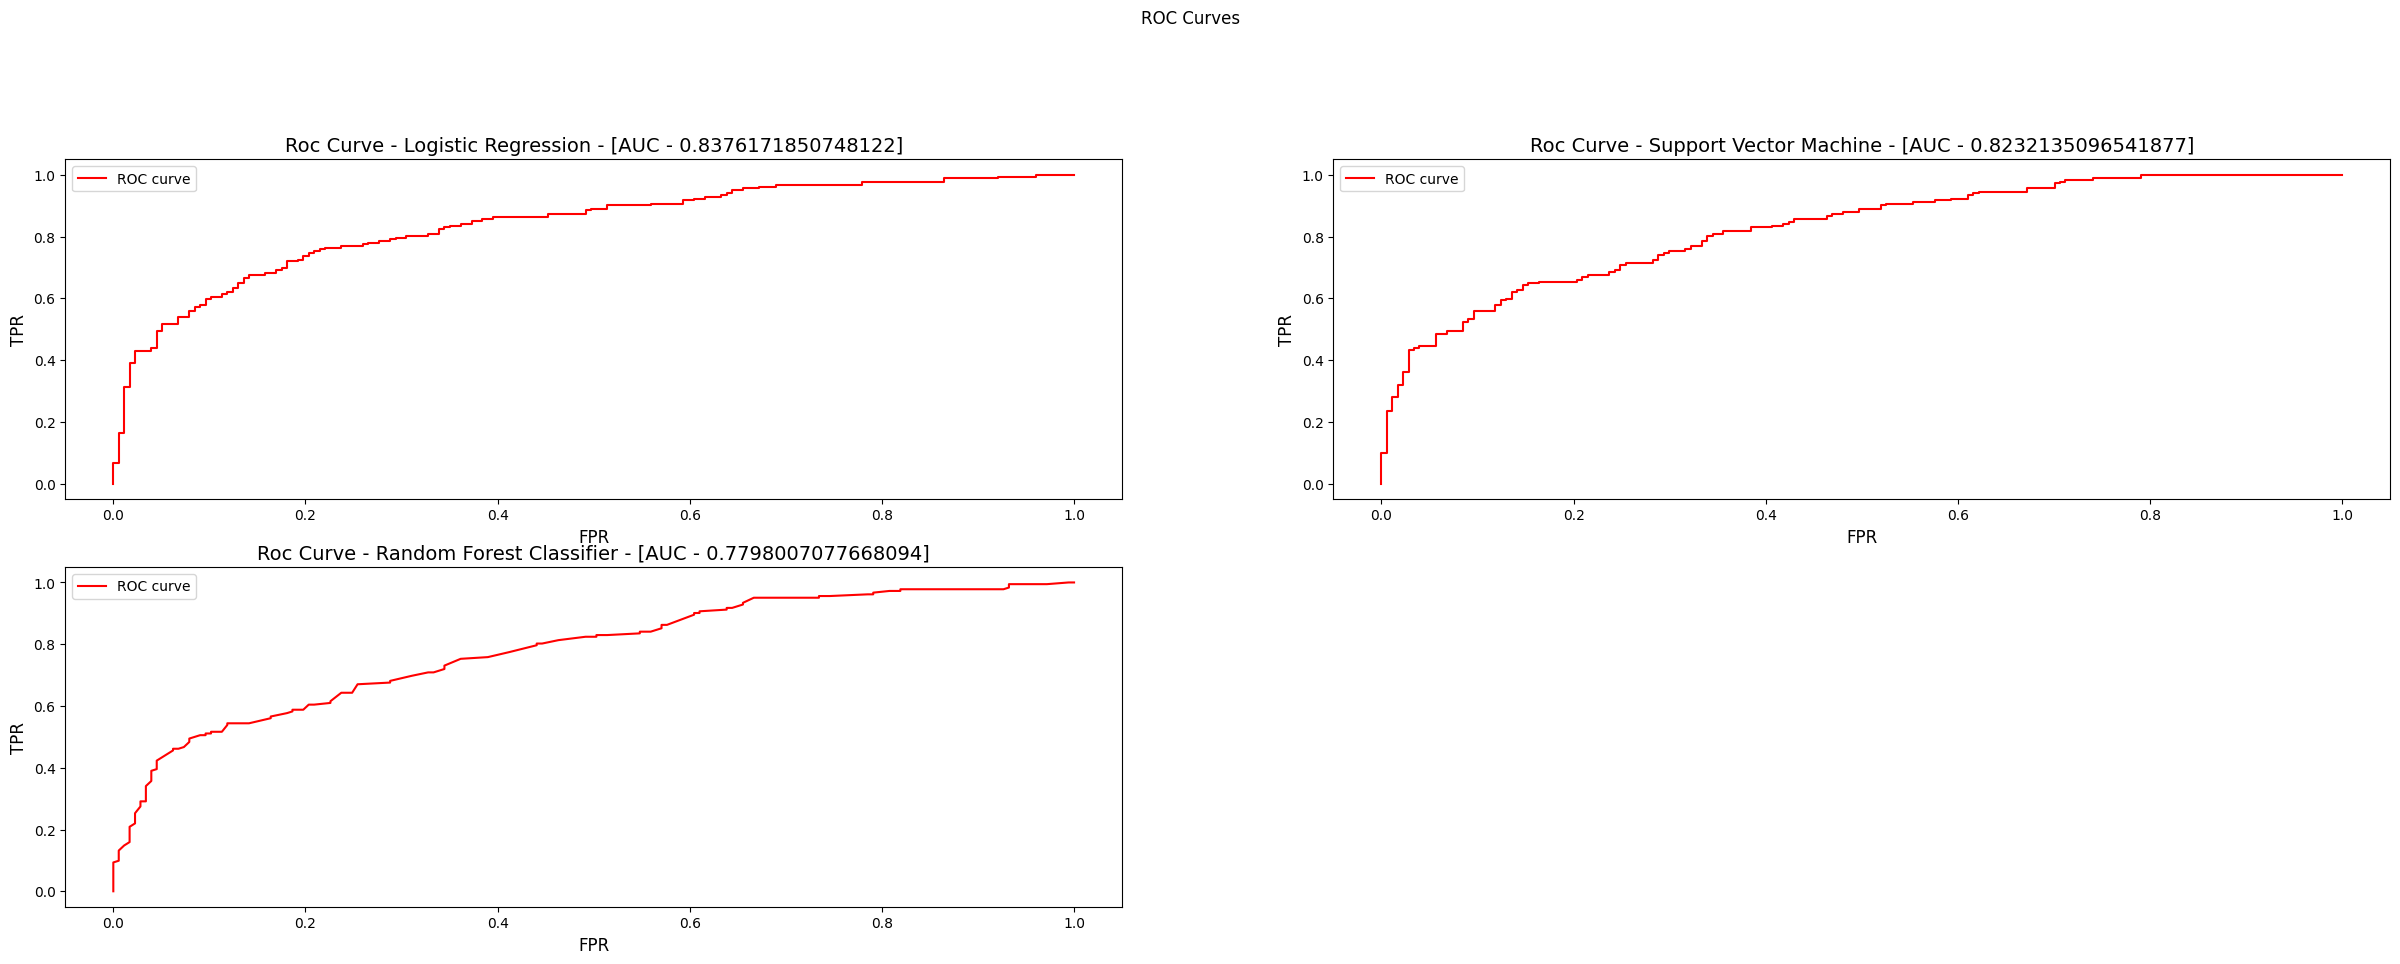

In [103]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]

plot = 1

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

<h3> Evaluate Model </h3>

In [104]:
# Logistic Regression
y_pred = lc.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred))
print('Precision of Logisitic Regression:', precision_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.713091922005571
Precision of Logisitic Regression: 0.9157894736842105


In [105]:
# SVC
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine:', accuracy_score(y_test, y_pred))
print('Precision of Support Vector Machine:', precision_score(y_test, y_pred))

Accuracy of Support Vector Machine: 0.6239554317548747
Precision of Support Vector Machine: 0.9607843137254902


In [106]:
# RVC
y_pred = rfc.predict(X_test)
print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred))
print('Precision of Random Forest Classifier:', precision_score(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.6406685236768802
Precision of Random Forest Classifier: 0.9076923076923077


<h3>2. TF* IDF </h3>

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
# conduct tf*idf vectorization on dataframe column
vectorizer = TfidfVectorizer()

tf_idf_train = vectorizer.fit_transform(training_data["Text"])
print(tf_idf_train.toarray())

tf_idf_test = vectorizer.transform(test_df["Text"])
print(tf_idf_test.toarray())

# split data into training and testing sets
X_train = tf_idf_train
X_test = tf_idf_test

y_train = training_data["Sentiment"]
y_test = test_df["Sentiment"]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h3> Models of TF*IDF </h3>

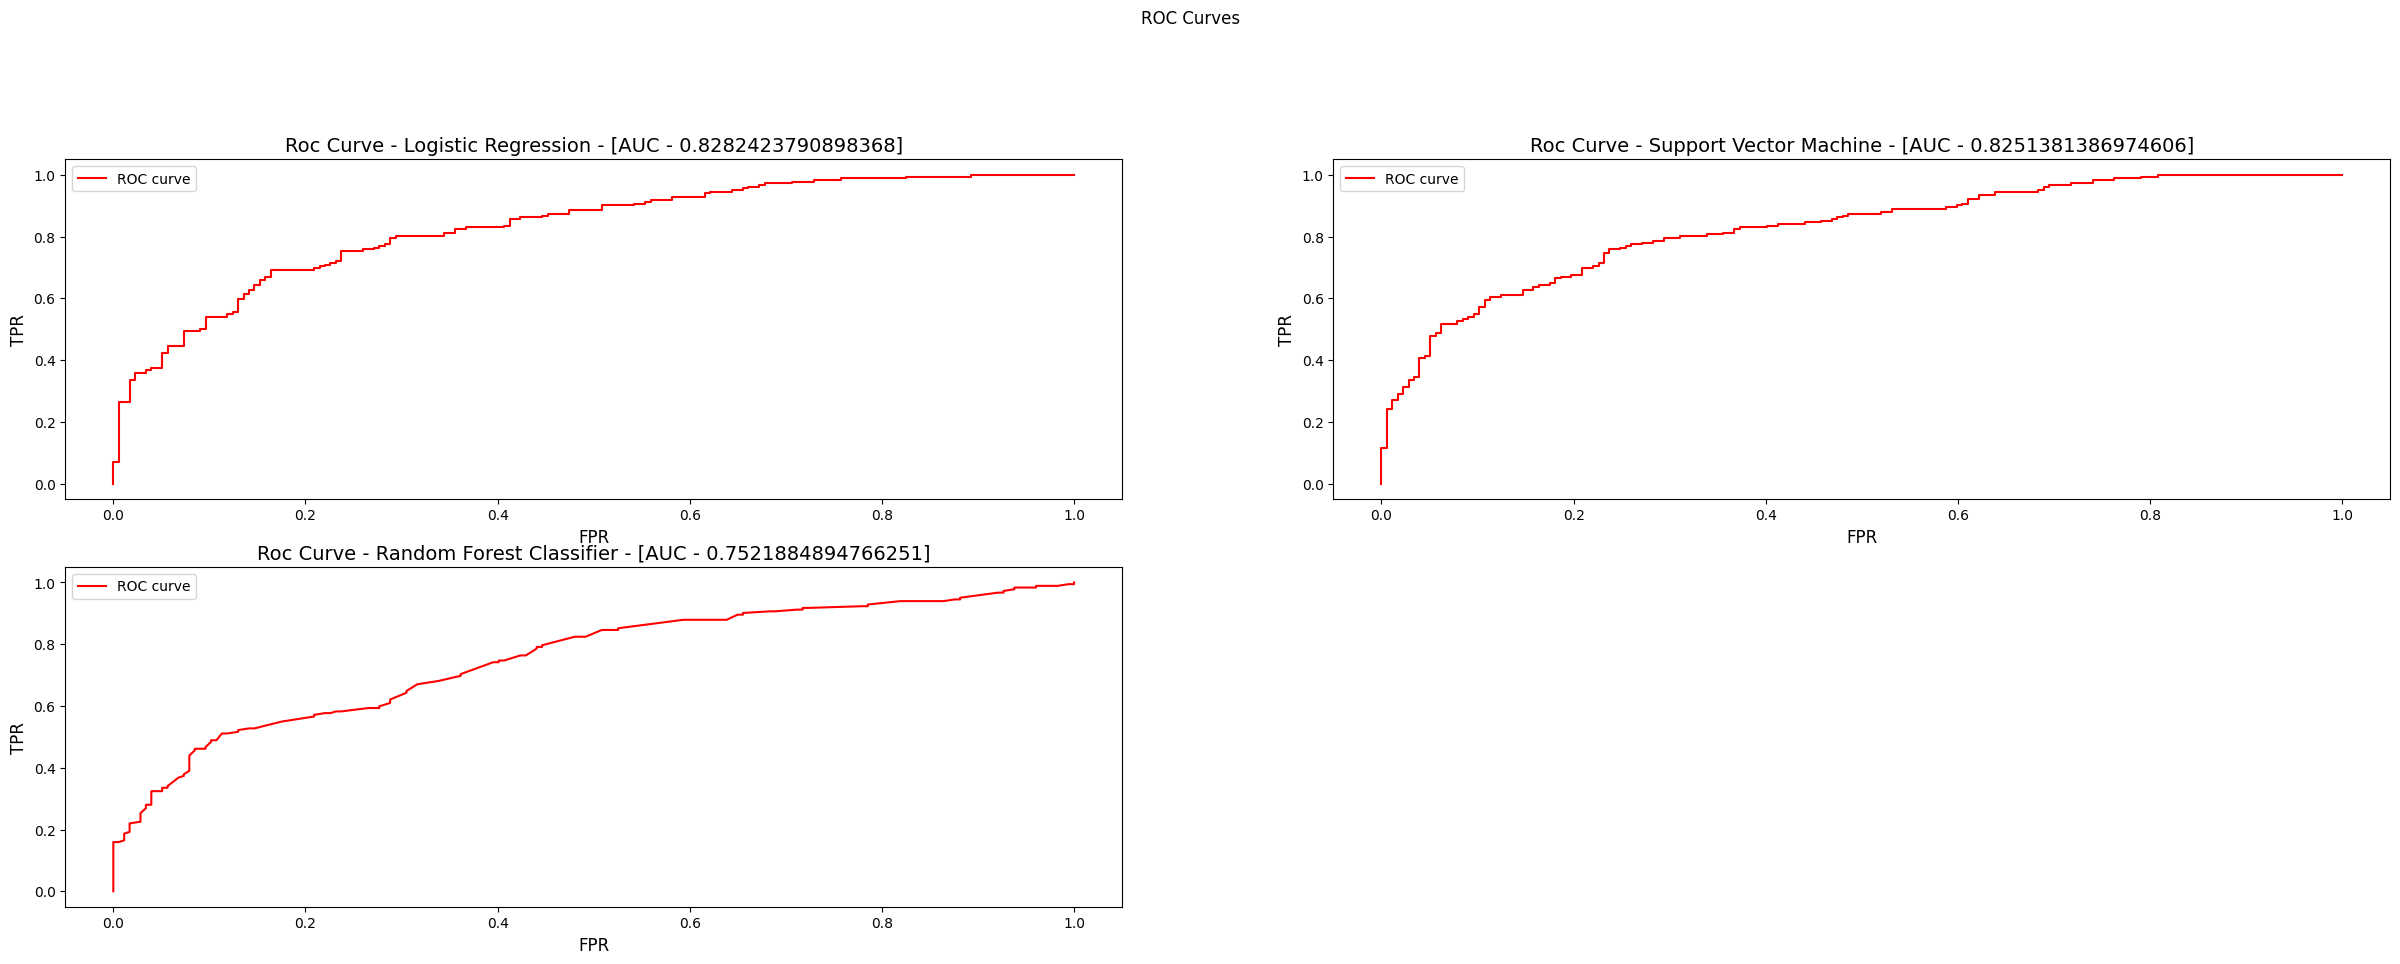

In [109]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]

plot = 1

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

<h3> Evaluate the Model </h3>

In [110]:
# Logistic Regression
y_pred = lc.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred))
print('Precision of Logisitic Regression:', precision_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.6295264623955432
Precision of Logisitic Regression: 0.9454545454545454


In [111]:
# SVC
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine:', accuracy_score(y_test, y_pred))
print('Precision of Support Vector Machine:', precision_score(y_test, y_pred))

Accuracy of Support Vector Machine: 0.5988857938718662
Precision of Support Vector Machine: 0.975


In [112]:
# RVC
y_pred = rfc.predict(X_test)
print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred))
print('Precision of Random Forest Classifier:', precision_score(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.596100278551532
Precision of Random Forest Classifier: 0.9302325581395349


<h3> Word 2 Vec </h3>

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Accuracy: 0.49303621169916434
Precision: 0.0


/Users/mayasingh/Documents/Machine Learning 2023/Assignment 2/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


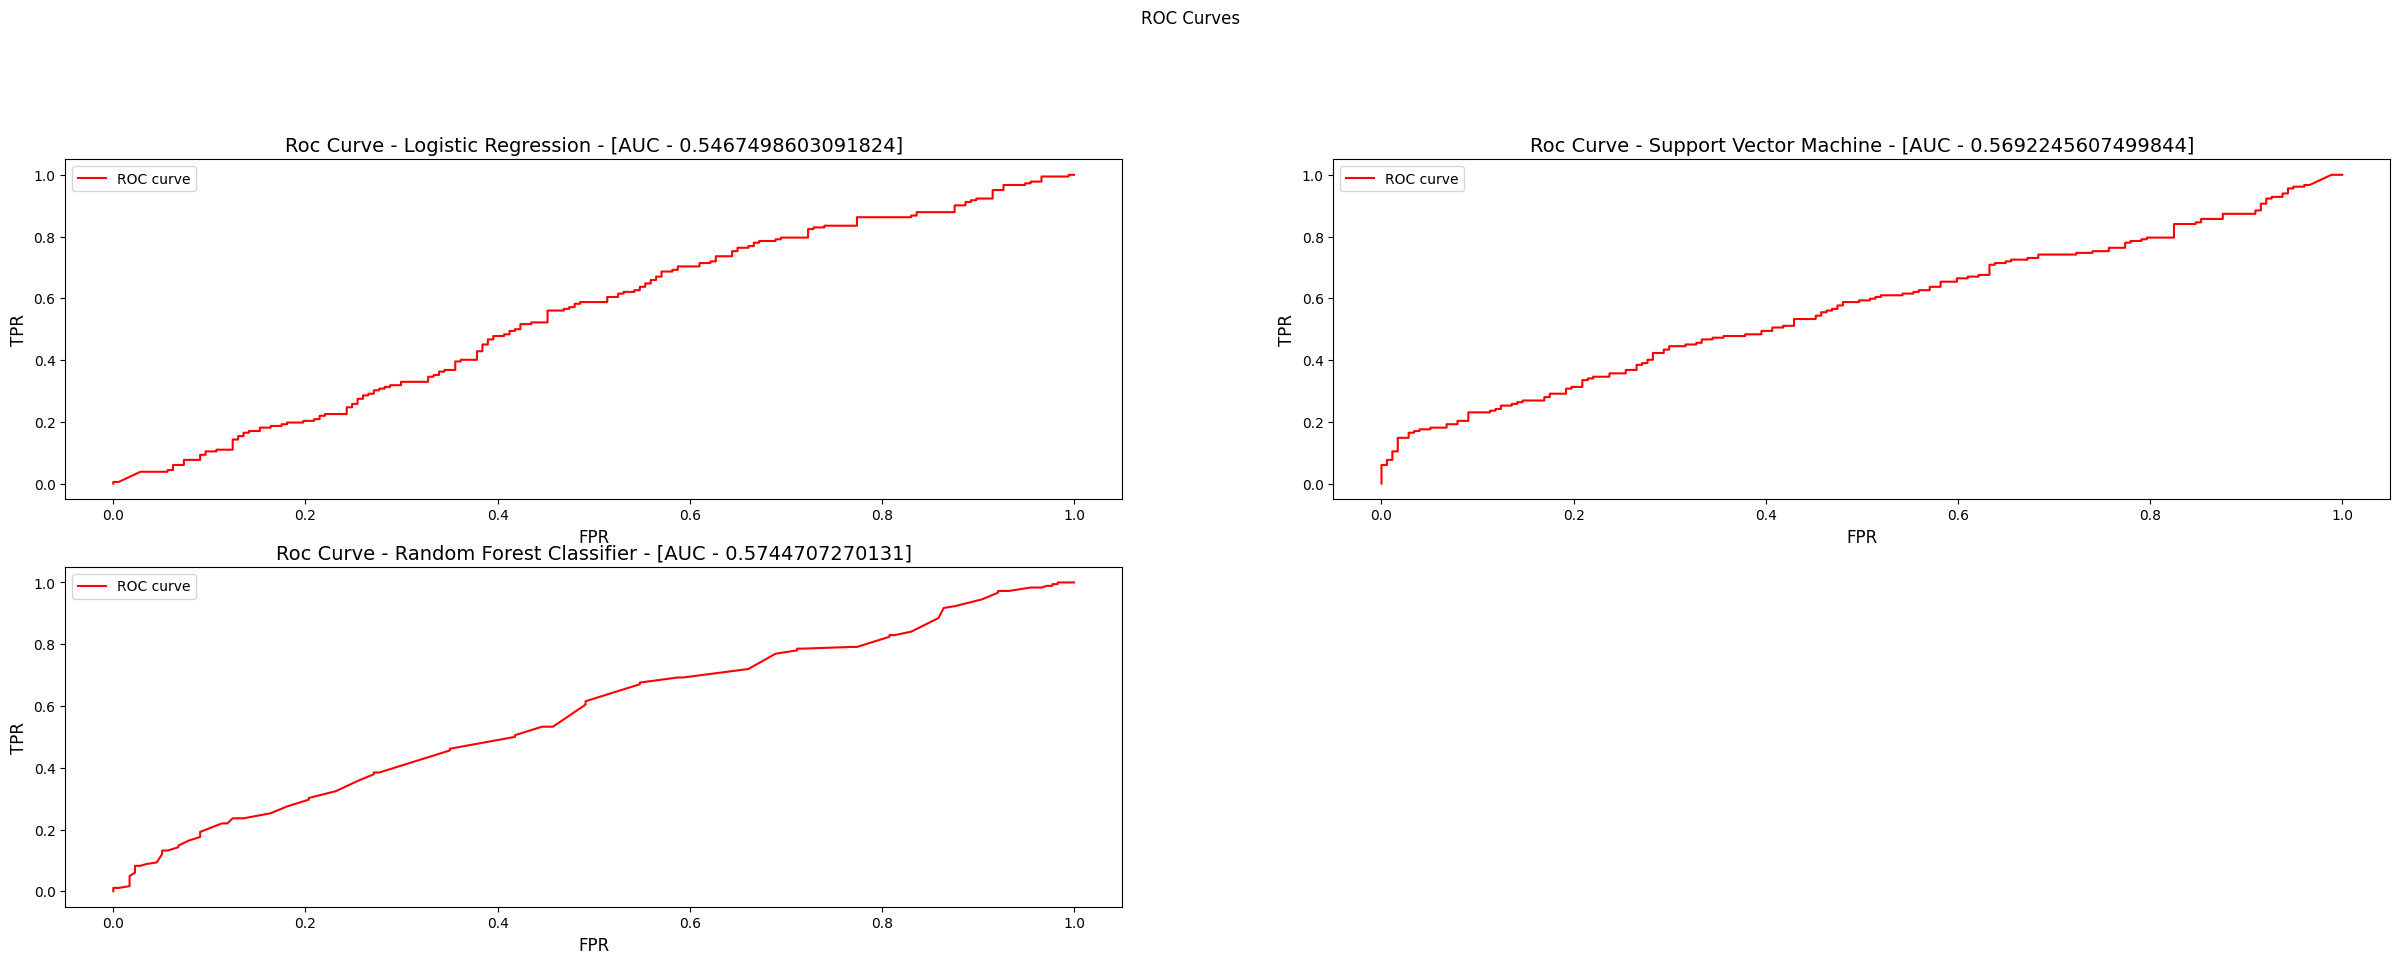

In [159]:
X_train = training_df["Text"].sample(frac=.01, random_state = 42)
X_test = test_df["Text"]

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Vectorize the text data
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])
y_train = training_df["Sentiment"].sample(frac = .01, random_state=  42)
y_test = test_df["Sentiment"]

# Train a classification model
clf = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

clf.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

y_lc_predicted = clf.predict(X_test)
y_lc_pred_proba = clf.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]

plot = 1

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()


In [161]:
# Logistic Regression
y_pred = clf.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred))
print('Precision of Logisitic Regression:', precision_score(y_test, y_pred))

# SVC
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine:', accuracy_score(y_test, y_pred))
print('Precision of Support Vector Machine:', precision_score(y_test, y_pred))

# RVC
y_pred = rfc.predict(X_test)
print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred))
print('Precision of Random Forest Classifier:', precision_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.49303621169916434
Precision of Logisitic Regression: 0.0


/Users/mayasingh/Documents/Machine Learning 2023/Assignment 2/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Support Vector Machine: 0.49303621169916434
Precision of Support Vector Machine: 0.0
Accuracy of Random Forest Classifier: 0.4986072423398329
Precision of Random Forest Classifier: 0.625


/Users/mayasingh/Documents/Machine Learning 2023/Assignment 2/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
